**Вступление**

В качестве аналитика крупного интернет-магазина, в данной работе рассмотрим два важных этапа: приоритизацию гипотез с помощью фреймворков ICE и RICE, а также анализ результатов A/B-теста, который был проведен для оценки эффективности выбранных изменений.

**Цель проекта** 
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**План работы:**

**Шаг 1.** Загрузка данных и подготовка к анализу

1.1. Импорт библиотек и загрузка данных.

1.2. Обзор данных.

1.3. Предобработка данных

**Шаг 2.** Принятие решении в бизнесе на основе данных

2.1. Приоритизация гипотез

2.2. Анализ A/B-теста

**Шаг 3.** Общие выводы

#### Загрузка данных и подготовка к анализу

##### Импорт библиотек и загрузка данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import datetime as dt
import seaborn as sns

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')   
orders = pd.read_csv('/datasets/orders.csv')           
visitors = pd.read_csv('/datasets/visitors.csv')  

Информация о датасетах:

1. Таблица hypothesis.csv:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;Impact — влияние на пользователей по 10-балльной шкале;Confidence — уверенность в гипотезе по 10-балльной шкале;Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. Таблица  orders.csv:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

3. Таблица visitors.csv :

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [3]:
pd.options.display.max_colwidth = 100
display(hypothesis)
print(hypothesis.info())
print('Количество дубликатов в hypothesis:', hypothesis.duplicated().sum())

display(orders)
print(orders.info())
print('Количество дубликатов в orders:', orders.duplicated().sum())

display(visitors)
print(visitors.info())
print('Количество дубликатов в visitors:', visitors.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Количество дубликатов в hypothesis: 0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Количество дубликатов в orders: 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Количество дубликатов в visitors: 0


***Промежуточный вывод:***

- Пропуски и дубликаты не обнаружены.
- Необходимо привести в формат даты колонку 'date' таблиц `orders` и `visitors`.

##### Предобработка данных.

In [4]:
# Приведем названия колонку к единому стилю
hypothesis.columns = hypothesis.columns.str.lower()

# Приведем в формат даты колонку date таблиц orders и visitors
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFr

***Промежуточный вывод:***

Данные обработаны и подготовлены к дальнейшему анализу.

In [5]:

# Находим всех пользователей, которые попали в обе группы
grouped_users = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group > 1')

# Выводим количество таких пользователей
print('Количество пользователей в обеих группах:', len(grouped_users))

# Выводим идентификаторы таких пользователей:
if len(grouped_users) > 0:
    display(grouped_users)

Количество пользователей в обеих группах: 58


,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2
351125977,2
393266494,2
457167155,2
471551937,2


Количество пользователей в обеих группах: 58. 
Полностью исключим этих пользователей из дальнейшего анализа. Это уменьшит искажения в данных и сделает результаты более надежными.

In [6]:
# Создаем список ID пользователей, которые должны быть исключены
abnormal_visitors = grouped_users.index

# Фильтруем данные orders и visitors, исключая аномальных пользователей
orders = orders[~orders['visitorId'].isin(abnormal_visitors)]

#### Принятие решении в бизнесе на основе данных 


##### Приоритизация гипотез.

Чтобы приоритизировать гипотезы по увеличению выручки интернет-магазина с использованием фреймворка ICE, рассчитаем ICE (по формуле `Impact × Confidence / Efforts`) для каждой гипотезы и отсортируем гипотезы по убыванию значения ICE:

In [7]:
# Расчет ICE для каждой гипотезы
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(3)

# Сортировка гипотез по убыванию значения ICE
hypothesis_sorted_ice = hypothesis.sort_values(by='ICE', ascending=False)

# Вывод отсортированной таблицы
display(hypothesis_sorted_ice[['hypothesis', 'ICE']])

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Приоритет имеет гипотеза о запуске акции, дающей скидку на товар в день рождения с показателем ICE 16.2, что указывает на высокое влияние и уверенность в эффективности при средних затратах на реализацию. Вторая по приоритету гипотеза - добавление новых каналов привлечения трафика, что также имеет значительный потенциальный воздействие на выручку.

Расчитаем RICE для оценки приоритетности гипотез, учитывая не только влияние, уверенность и затраты на проверку, но и охват аудитории (по формуле `Reach X Impact X Confidence / Effort`):

In [8]:
# Расчет RICE для каждой гипотезы 
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# Сортировка гипотез по убыванию значения RICE
hypothesis_sorted_rice = hypothesis.sort_values(by='RICE', ascending=False)

# Вывод отсортированной таблицы по столбцам hypothesis и RICE
display(hypothesis_sorted_rice[['hypothesis', 'RICE']])

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Важные изменения в приоритизации:

1. Гипотеза о добавлении формы подписки на все основные страницы (Гипотеза 7) переместилась с третьего места по ICE на первое место по RICE. Это произошло благодаря высокому охвату пользователей, что увеличило её приоритет при учёте RICE.

2. Гипотеза о добавлении блоков рекомендаций товаров (Гипотеза 2) поднялась с пятого места на второе. Также благодаря высокому охвату этот параметр сильно повысил её значение RICE по сравнению с ICE.

3. Гипотеза о запуске акции со скидками (Гипотеза 8), лидер по ICE, опустилась на пятое место по RICE. Несмотря на высокие оценки по воздействию и уверенности, ограниченный охват этой меры снизил её приоритетность в оценке RICE.

4. Другие гипотезы также переместились в списке в зависимости от их охвата пользователей, что подтверждает важность учета этого параметра при планировании масштабных изменений, особенно в больших интернет-магазинах.

##### Анализ A/B-теста.

###### Построим график кумулятивной выручки по группам.

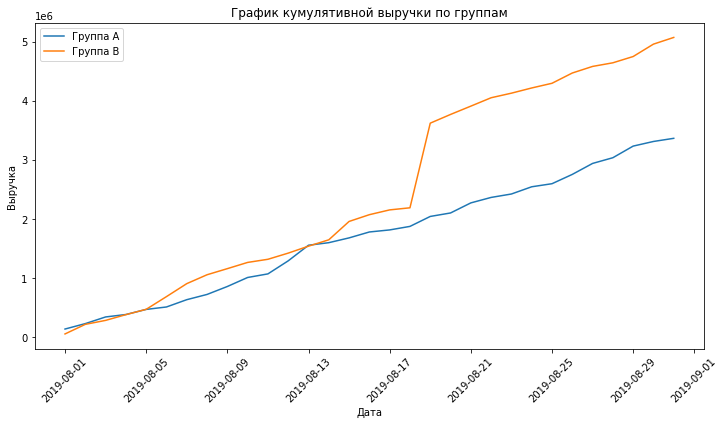

In [9]:
# Сначала агрегируем данные о заказах по дате и группе
data_agg = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()

# Рассчитаем кумулятивную выручку
data_agg['cumulative_revenue'] = data_agg.groupby('group')['revenue'].cumsum()

# Разделим данные по группам для удобства построения
group_a = data_agg[data_agg['group'] == 'A']
group_b = data_agg[data_agg['group'] == 'B']

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(group_a['date'], group_a['cumulative_revenue'], label='Группа A')
plt.plot(group_b['date'], group_b['cumulative_revenue'], label='Группа B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.xticks(rotation=45)
plt.show()

На графике видно, что до определенного момента (примерно 18 августа 2019 года) темпы роста выручки групп A и B были сопоставимы, с небольшим преимуществом у группы B. Однако после этой даты в группе B произошел заметный скачок выручки, который может указывать на внезапное увеличение количества заказов или на появление аномально дорогих заказов.

Такой резкий всплеск в группе B потенциально может исказить результаты теста, так как существенно повышает общую выручку группы, что может не отражать реального улучшения пользовательского опыта или эффективности. Это подчеркивает необходимость дополнительного анализа данных на предмет выбросов или аномальных заказов, которые могли бы повлиять на результаты тестирования.

###### Построим график кумулятивного среднего чека по группам

        date group  revenue  orders  cumulative_revenue  cumulative_orders
0 2019-08-01     A   142779      23              142779                 23
1 2019-08-01     B    59758      17               59758                 17
2 2019-08-02     A    91602      19              234381                 42
3 2019-08-02     B   162043      23              221801                 40
4 2019-08-03     A   112473      24              346854                 66


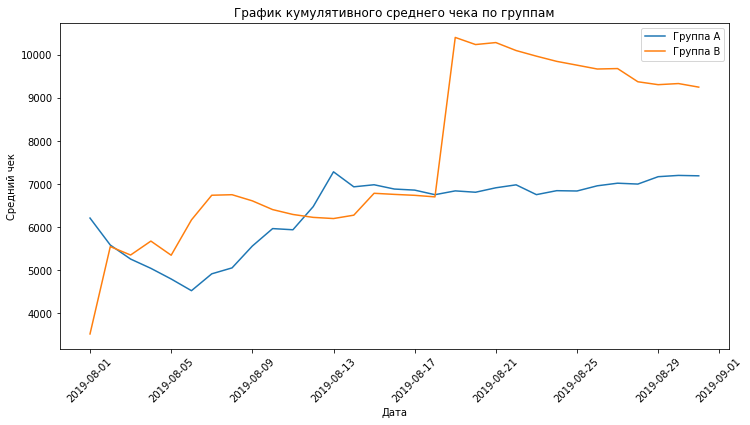

In [10]:
# Агрегация данных по дате и группе
data_agg = orders.groupby(['date', 'group']).agg(
    revenue=('revenue', 'sum'),
    orders=('transactionId', 'count')
).reset_index()

# Расчет кумулятивных сумм по выручке и заказам
data_agg['cumulative_revenue'] = data_agg.groupby('group')['revenue'].cumsum()
data_agg['cumulative_orders'] = data_agg.groupby('group')['orders'].cumsum()

# Проверка что данные в столбцах добавились
print(data_agg.head())

# Расчет кумулятивного среднего чека
data_agg['cumulative_avg_check'] = data_agg['cumulative_revenue'] / data_agg['cumulative_orders']

# Разделение данных по группам для визуализации
group_a = data_agg[data_agg['group'] == 'A']
group_b = data_agg[data_agg['group'] == 'B']

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(group_a['date'], group_a['cumulative_avg_check'], label='Группа A')
plt.plot(group_b['date'], group_b['cumulative_avg_check'], label='Группа B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=45)
plt.show()

В то время как средний чек в группе A в течение теста достиг стабильности, в группе B наблюдается значительный скачок, который может указывать на наличие аномальных значений в данных. Для принятия обоснованного решения на основании этой метрики потребуется дополнительный анализ для идентификации и исключения выбросов.

###### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

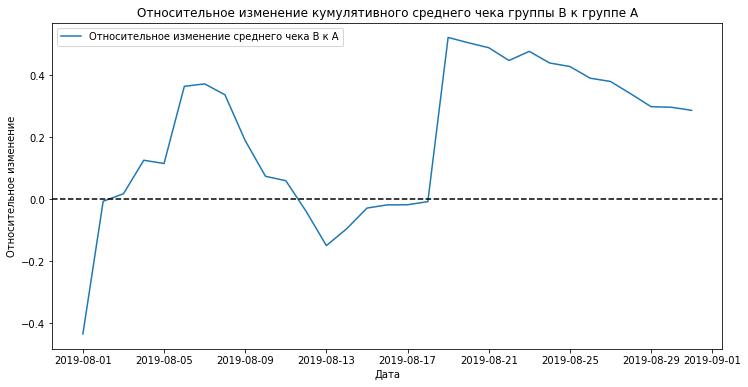

In [11]:
# Расчет кумулятивных данных по дням и группам
orders_cumulative = orders.groupby(['date', 'group']).agg({'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}).groupby('group').cumsum()
orders_cumulative = orders_cumulative.reset_index()

visitors_cumulative = visitors.groupby(['date', 'group']).agg({'visitors':'sum'}).groupby('group').cumsum()
visitors_cumulative = visitors_cumulative.reset_index()

# Объединение кумулятивных данных по заказам и посетителям
cumulative_data = orders_cumulative.merge(visitors_cumulative, on=['date', 'group'])
cumulative_data['average_check'] = cumulative_data['revenue'] / cumulative_data['transactionId']

# Разделение данных по группам
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

# Объединение данных по среднему чеку в один DataFrame
merged_cumulative_checks = cumulative_data_A[['date', 'average_check']].merge(cumulative_data_B[['date', 'average_check']], on='date', suffixes=['_A', '_B'])

# Расчет относительного изменения для среднего чека
merged_cumulative_checks['relative_change'] = merged_cumulative_checks['average_check_B'] / merged_cumulative_checks['average_check_A'] - 1

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_checks['date'], merged_cumulative_checks['relative_change'], label='Относительное изменение среднего чека B к A')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()
plt.show()

В нескольких точках времени теста наблюдались значительные изменения в результатах. Вероятно, в эти моменты происходили аномально крупные заказы, которые искажали общую картину.

count      143.000000
mean      7512.979021
std      11366.923413
min         90.000000
25%       1340.000000
50%       3270.000000
75%       7115.000000
max      67990.000000
Name: revenue, dtype: float64


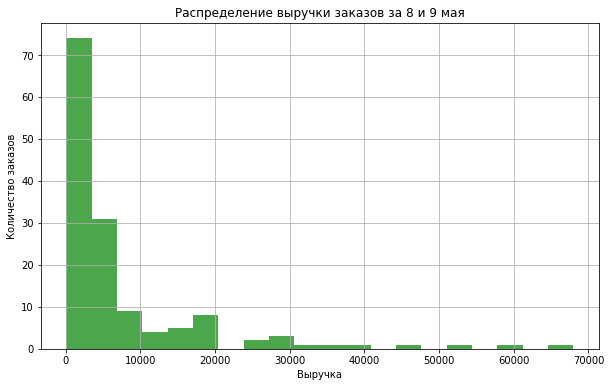

     transactionId   visitorId       date  revenue group
743     3603576309  4133034833 2019-08-09    67990     A
940     2420050534  4003628586 2019-08-08    58550     B
613     4071177889  3931967268 2019-08-07    53904     B
709      514501382   950626008 2019-08-07    45880     A
420     2788225284  1606766439 2019-08-06    37550     B


In [12]:
# Интересующие даты
dates_of_interest = ['2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09']

# Фильтруем данные для этих дат
orders_on_dates = orders[orders['date'].isin(dates_of_interest)]

# Смотрим распределение значений выручки
print(orders_on_dates['revenue'].describe())

# Визуализация распределения
plt.figure(figsize=(10, 6))
plt.hist(orders_on_dates['revenue'], bins=20, color='green', alpha=0.7)
plt.title('Распределение выручки заказов за 8 и 9 мая')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

# Анализируем детали заказов
print(orders_on_dates.sort_values(by='revenue', ascending=False).head())


Медианная выручка (3270 рублей) остаётся намного ниже средней, что подчеркивает наличие нескольких очень крупных заказов, влияющих на среднее значение.
Максимальный заказ составил 67990 рублей, что существенно исказило данные.
Заказ на 67990 рублей (группа A, 9 августа) и заказ на 58550 рублей (группа B, 8 августа) могут сильно влиять на анализ кумулятивных данных. Эти значения заметно выделяются на фоне других и потенциально искажают результаты теста.

###### Построим график кумулятивного среднего количества заказов на посетителя по группам.

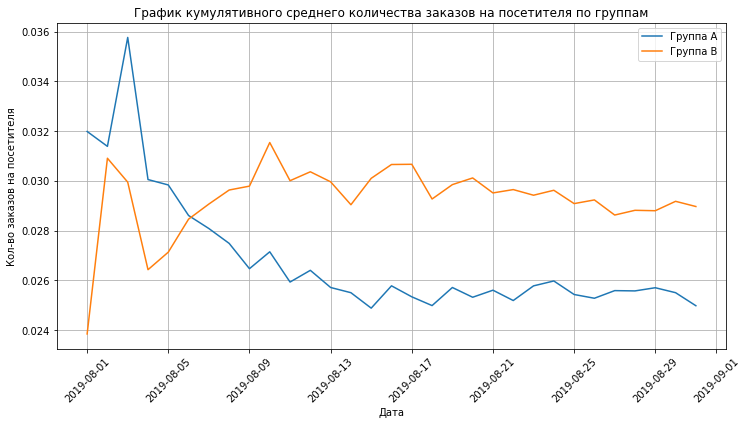

In [13]:
# Агрегация данных по заказам по дате и группе
orders_daily = orders.groupby(['date', 'group']).agg(
    orders=('transactionId', 'count')
).reset_index()

# Агрегация данных по посетителям по дате и группе
visitors_daily = visitors.groupby(['date', 'group']).agg(
    visitors=('visitors', 'sum')
).reset_index()

# Объединение данных по заказам и посетителям
data_agg = pd.merge(orders_daily, visitors_daily, on=['date', 'group'])

# Расчет кумулятивных данных
data_agg['cumulative_orders'] = data_agg.groupby('group')['orders'].cumsum()
data_agg['cumulative_visitors'] = data_agg.groupby('group')['visitors'].cumsum()

# Расчет кумулятивной конверсии
data_agg['cumulative_conversion'] = data_agg['cumulative_orders'] / data_agg['cumulative_visitors']

# Разделение данных по группам для визуализации
group_a = data_agg[data_agg['group'] == 'A']
group_b = data_agg[data_agg['group'] == 'B']

# Построение графика кумулятивной конверсии
plt.figure(figsize=(12, 6))
plt.plot(group_a['date'], group_a['cumulative_conversion'], label='Группа A')
plt.plot(group_b['date'], group_b['cumulative_conversion'], label='Группа B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов на посетителя')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Группа A начала тест с более высокой средним количеством заказов на посетителя по сравнению с группой B, но со временем её показатели ухудшились. В то же время, группа B, начав с более низких значений, постепенно выровняла свои показатели и стабилизировала их на уровне, который превышает показатели группы A.

###### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

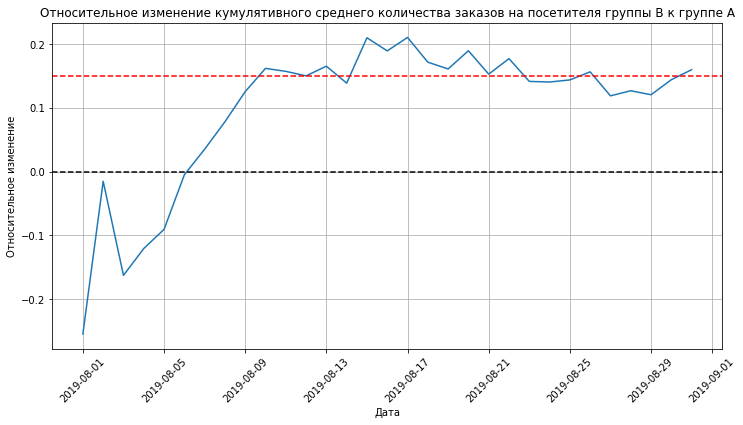

In [14]:
# Слияние данных по группам A и B по дате
merged_data = pd.merge(group_a[['date', 'cumulative_conversion']], group_b[['date', 'cumulative_conversion']],
                       on='date', suffixes=['_A', '_B'])

# Расчет относительного изменения конверсии
merged_data['relative_change'] = merged_data['cumulative_conversion_B'] / merged_data['cumulative_conversion_A'] - 1

# Построение графика относительного изменения кумулятивной конверсии
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_change'])
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

В начале теста наблюдаются колебания в данных, но с течением времени группа B стабильно превосходит группу A по количеству заказов.

###### Построим  точечный график количества заказов по пользователям.

Распределение количества заказов по пользователям:


,orders,numberOfUsers
0,1,937
1,2,29
2,3,7


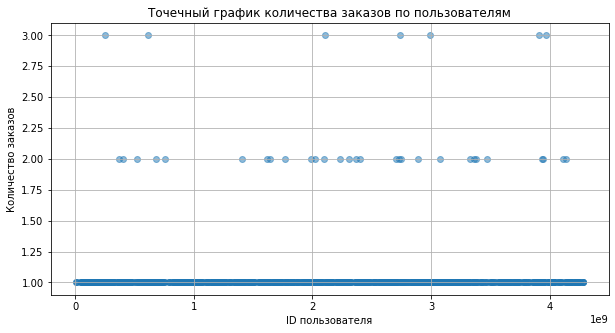

In [15]:
# Сгруппируем данные по ID пользователей и подсчитаем количество заказов
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

# Переименуем колонки для удобства
orders_by_users.columns = ['userId', 'orders']

# Группируем пользователей по количеству заказов и подсчитываем количество пользователей в каждой группе
orders_distribution = orders_by_users.groupby('orders', as_index=False).agg({'userId': 'count'})

# Переименуем колонки для лучшего понимания
orders_distribution.columns = ['orders', 'numberOfUsers']

# Выводим результат
print("Распределение количества заказов по пользователям:")
display(orders_distribution)

# Построим точечный график количества заказов по пользователям
plt.figure(figsize=(10, 5))
plt.scatter(orders_by_users['userId'], orders_by_users['orders'], alpha=0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('ID пользователя')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Большинство пользователей (937 из 1031) сделали всего один заказ. Количество пользователей, делающих два заказа и более, значительно уменьшается с увеличением количества заказов. Так, только 64 пользователя сделали по два заказа, и всего 30 пользователей сделали более двух заказов.

Наличие небольшого числа пользователей с очень высоким количеством заказов (например, 8, 9, и 11 заказов) может указывать на наличие выбросов, которые могут искажать общую картину и анализ эффективности теста. 

###### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [16]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 1. 2.]


В ходе тестирования, более чем у 5% пользователей наблюдалось две покупки, в то время как только у 1% было две или более покупок. Определим верхнюю границу нормального количества заказов как два на пользователя.

###### Построим  точечный график стоимостей заказов.

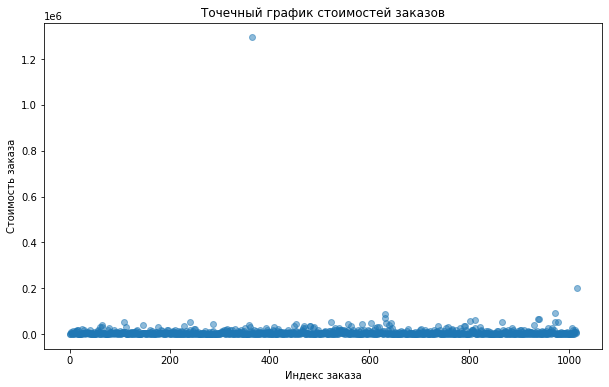

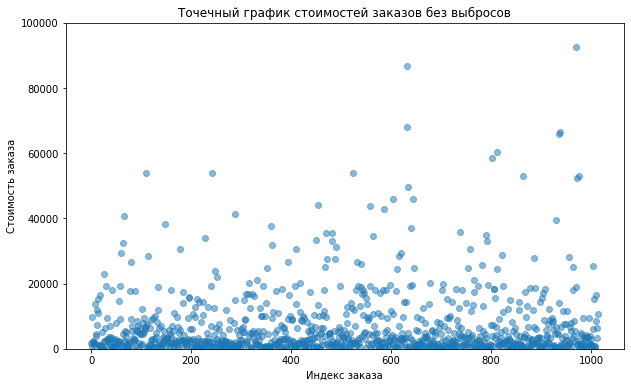

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(orders.shape[0]), y=orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Индекс заказа')
plt.ylabel('Стоимость заказа')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x=range(orders.shape[0]), y=orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов без выбросов')
plt.xlabel('Индекс заказа')
plt.ylabel('Стоимость заказа')
plt.ylim([0, 100000])  
plt.show()

Видно 2 отчетливых выброса. Посмотрим на информацию о стоимостях заказов

In [18]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
5%       3.000000e+02
50%      2.955000e+03
90%      1.799000e+04
95%      2.678500e+04
99%      5.390400e+04
max      1.294500e+06
Name: revenue, dtype: float64

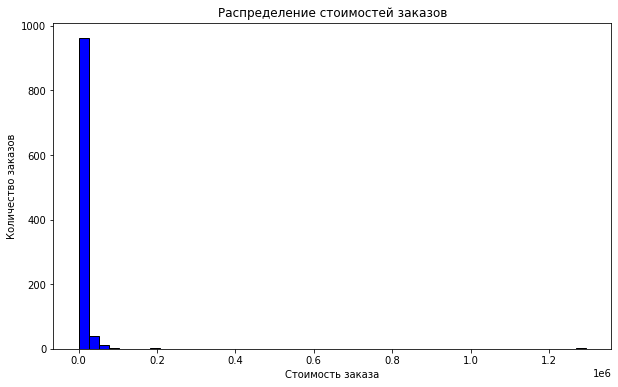

In [19]:
display(orders['revenue'].describe(percentiles=[0.05, 0.50, 0.90, 0.95, 0.99]))

# Строим гистограмму для стоимости заказов
plt.figure(figsize=(10, 6))
plt.hist(orders['revenue'], bins=50, color='blue', edgecolor='black')
plt.title('Распределение стоимостей заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.show()

Средняя стоимость заказа составляет около 8,348 рублей, что может быть повышено из-за наличия очень дорогих заказов, как видно из стандартного отклонения в 39,191 рублей и максимального значения в 1,294,500 рублей.
На уровне 95-го перцентиля стоимость заказа составляет 27,000 рублей - будет границей для определения аномальных заказов, а 99-й перцентиль на уровне 54,000 рублей показывает, что только 1% заказов превышает эту сумму.

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Объявим нулевую и альтернативные гипотезы: 

**H0** = cтатистически значимых различий в среднем количестве заказов между группами нет.

**H1** = cтатистически значимые различия в среднем количестве заказов между группами есть.

Применим тест Манна-Уитни, который позволяет сравнивать две независимые выборки.

Alpha = 0.05

In [20]:
# Подсчет количества заказов на пользователя в каждой группе
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b.columns = ['userId', 'orders']

# Подготовка данных о посетителях для каждой группы
visitors_daily_a = visitors[visitors['group'] == 'A']
visitors_daily_b = visitors[visitors['group'] == 'B']

# Создание выборок
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(visitors_daily_a['visitors'].sum() - len(orders_by_users_a)), name='orders')], axis=0)
sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(visitors_daily_b['visitors'].sum() - len(orders_by_users_b)), name='orders')], axis=0)

# Применяем тест Манна-Уитни
results = mannwhitneyu(sample_a, sample_b)
print('p-value:', results.pvalue)

# Средние значения
print("Среднее количество заказов в группе A:", '{0:.3f}'.format(sample_a.mean()))
print("Среднее количество заказов в группе B:", '{0:.3f}'.format(sample_b.mean()))

# Относительное различие между группами:
print("Относительное различие между группами: ", '{0:.3f}'.format(sample_b.mean()/sample_a.mean() - 1))

# Определение статуса нулевой гипотезы
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия между группами.")
else:
    print("Принимаем нулевую гипотезу: статистически значимых различий между группами нет.")

p-value: 0.011018084110014696
Среднее количество заказов в группе A: 0.025
Среднее количество заказов в группе B: 0.029
Относительное различие между группами:  0.160
Отвергаем нулевую гипотезу: существуют статистически значимые различия между группами.


P-value составляет около 0.011, что меньше стандартного порога значимости в 0.05. Это позволяет нам отвергнуть нулевую гипотезу о том, что в среднем количество заказов на посетителя в группах А и В одинаково. Статистический тест показывает, что различия между группами являются значимыми.

Среднее количество заказов в группе B (около 0.029) выше, чем в группе A (около 0.025). Это указывает на то, что участники из группы B в среднем совершают больше заказов, чем участники из группы A. Этот результат может свидетельствовать о том, что изменения, тестировавшиеся в группе B, могли положительно повлиять на конверсию и активность пользователей.

###### Посчитаем статистическую значимость различий в среднем чеке заказа (конверсия) между группами по «сырым» данным.

Объявим нулевую и альтернативные гипотезы: 

**H0** = cтатистически значимых различий в среднем чеке между группами нет.

**H1** = cтатистически значимых различий в среднем чеке между группами есть.

Применим тест Манна-Уитни, который позволяет сравнивать две независимые выборки.


In [21]:
# Группировка данных по группам и вычисление среднего чека
orders_a = orders[orders['group'] == 'A']['revenue']
orders_b = orders[orders['group'] == 'B']['revenue']

# Применение теста Манна-Уитни
results = stats.mannwhitneyu(orders_a, orders_b, alternative='two-sided')

print("p-value:", results.pvalue)
print("Средний чек группы A:", orders_a.mean())
print("Средний чек группы B:", orders_b.mean())

# Относительное различие между группами:
print("Относительное различие между группами: ", '{0:.3f}'.format(orders_b.mean()/orders_a.mean() - 1))

# Определение статуса нулевой гипотезы
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия в среднем чеке между группами.")
else:
    print("Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет.")

p-value: 0.8294908998149533
Средний чек группы A: 7189.4358974358975
Средний чек группы B: 9249.94890510949
Относительное различие между группами:  0.287
Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет.


Несмотря на то что средний чек в группе B выше, чем в группе A, статистически значимых различий между группами не обнаружено (p-value значительно выше 0.05). Это указывает на то, что различия в среднем чеке могут быть случайными.

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Объявим нулевую и альтернативные гипотезы: 

**H0** = cтатистически значимых различий в среднем чеке между группами нет.

**H1** = cтатистически значимых различий в среднем чеке между группами есть.

Применим тест Манна-Уитни, который позволяет сравнивать две независимые выборки.


In [22]:
# Определение аномальных пользователей по стоимости заказов
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId'].unique()

# Определение аномальных пользователей по количеству заказов
users_with_many_orders = orders.groupby('visitorId').filter(lambda x: len(x) > np.percentile(orders_by_users['orders'], 95))['visitorId'].unique()

# Объединение массивов пользователей
abnormal_users = np.union1d(users_with_expensive_orders, users_with_many_orders)

# Отфильтруем заказы, исключая аномальных пользователей
filtered_orders = orders[~orders['visitorId'].isin(abnormal_users)]

# Подготовка данных для теста
orders_by_users_a = filtered_orders[filtered_orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b = filtered_orders[filtered_orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

# Создаем выборки, где каждый посетитель группы встречается столько раз, сколько у него заказов
sample_a = pd.concat([orders_by_users_a['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a['transactionId'])), name='transactionId')], axis=0)
sample_b = pd.concat([orders_by_users_b['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b['transactionId'])), name='transactionId')], axis=0)

# Относительное различие между группами:
print("Относительное различие между группами: ", '{0:.3f}'.format(sample_b.mean()/sample_a.mean() - 1))

# Тест Манна-Уитни
results = stats.mannwhitneyu(sample_a, sample_b, alternative='two-sided')
print("p-value:", results.pvalue)

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем количестве заказов на посетителя между группами.")
else:
    print("Принимаем нулевую гипотезу: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.")

# Подсчет количества аномальных пользователей
number_of_abnormal_users = len(abnormal_users)
print("Количество аномальных пользователей:", number_of_abnormal_users)

Относительное различие между группами:  0.173
p-value: 0.016200908573143418
Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем количестве заказов на посетителя между группами.
Количество аномальных пользователей: 86


Между группами A и B существуют статистически значимые различия в среднем количестве заказов на посетителя.

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Объявим нулевую и альтернативные гипотезы: 

**H0** = cтатистически значимых различий в среднем чеке заказа между группами нет.

**H1** = cтатистически значимых различий в среднем чеке заказа между группами есть.

Применим тест Манна-Уитни, который позволяет сравнивать две независимые выборки.


In [23]:
# Условия для идентификации аномальных заказов

# Определение аномальных пользователей
#abnormal_users = orders[(orders['revenue'] > revenue_limit) | (orders.groupby('visitorId').transform('count')['transactionId'] > orders_limit)]['visitorId'].unique()

# Фильтрация данных
# filtered_orders = orders[~orders['visitorId'].isin(abnormal_users)]

# Разделение данных по группам
filtered_orders_a = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_orders_b = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Применение теста Манна-Уитни
results = mannwhitneyu(filtered_orders_a, filtered_orders_b, alternative='two-sided')

print("p-value:", results.pvalue)
print("Средний чек группы A:", filtered_orders_a.mean())
print("Средний чек группы B:", filtered_orders_b.mean())

# Относительное различие между группами:
print("Относительное различие между группами: ", '{0:.3f}'.format(filtered_orders_b.mean()/filtered_orders_a.mean() - 1))

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке на посетителя между группами.")
else:
    print("Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке на посетителя между группами нет.")


p-value: 0.7271286894009963
Средний чек группы A: 5046.490147783251
Средний чек группы B: 4876.251559251559
Относительное различие между группами:  -0.034
Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке на посетителя между группами нет.


Статистически значимых различий в среднем чеке между группами A и B не обнаружено. Средние чеки групп оказались практически одинаковыми

#### Общие выводы

**Предобработка данных**

Перед началом теста была проведена предобработка данных, включающая проверку на пропуски, дубликаты. Пропуски и дубликаты не обнаружены. Привели в формат даты колонку 'date' таблиц orders и visitors.
Удалены пользователи, оказавшиеся одновременно в двух группах в таблице orders.

**Приоритезация гипотез**

Из предложенных маркетинговым отделом гипотез для улучшения работы интернет-магазина, особое внимание было уделено следующим:

- "Запустить акцию, дающую скидку на товар в день рождения",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


С учетом охвата аудитории, приоритеты были расставлены следующим образом:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".



**Процесс A/B-тестирования**

A/B-тест был организован с целью проверки выбранных гипотез. Участники были разделены на две группы: контрольную (A) и тестовую (B). В ходе теста мы собрали данные о конверсии и среднем чеке в обеих группах, как в исходном виде, так и после очистки от аномалий.

**Анализ результатов**

- Среднее количество заказов на пользователя: Обнаружено статистически значимое увеличение в группе B по сравнению с группой A как по "сырым", так и по "очищенным" данным.


- Средний чек: Не было обнаружено статистически значимых различий в среднем чеке между группами, при этом средний чек группы B на "очищенных" данных выше на примерно 2%.

- График относительных изменений: Показывает, что показатели группы B стабильно превосходят показатели группы A.

**Рекомендации по результатам теста**

Основываясь на данных анализа, рекомендуется остановить тест и признать победу группы B. Внедрение изменений, протестированных в группе B, в регулярную практику рекомендуется из-за увеличения конверсии при неизменном среднем чеке, что приведет к увеличению общей выручки.